In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [21]:
clf_list = []
logreg_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
svc_clf = SVC(kernel = 'linear', random_state = 0)

In [22]:
clf_names = [
    "Nearest_Neighbors_clf",
    "Linear_SVM_clf",
    "RBF_SVM_clf",
    "Gaussian_Process_clf",
    "Decision_Tree_clf",
    "Random_Forest_clf",
    "Neural_Net_clf",
    "AdaBoost_clf",
    "Naive_Bayes_clf",
    "QDA",
]

In [23]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [2]:
histone_markers_list = ['H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me2']

In [3]:
df_prediction= pd.read_csv("/data/projects/Enhancer/2024_work/Fine-tune_data_using_SCREEN/TFBS_prediction/dev.tsv", sep="\t")
df_prediction

,Sequence,Label
0,CTGATC TGATCA GATCAT ATCATT TCATTC CATTCT ATTC...,1
1,TGGTGA GGTGAA GTGAAA TGAAAT GAAATC AAATCC AATC...,1
2,TTCATA TCATAC CATACA ATACAA TACAAA ACAAAT CAAA...,1
3,CAAACC AAACCC AACCCA ACCCAC CCCACT CCACTA CACT...,1
4,ACTGAT CTGATT TGATTT GATTTA ATTTAC TTTACC TTAC...,1
...,...,...
395,CTAATA TAATAA AATAAT ATAATT TAATTA AATTAG ATTA...,0
396,CTGAAC TGAACA GAACAC AACACA ACACAG CACAGA ACAG...,0
397,CACATC ACATCT CATCTC ATCTCA TCTCAG CTCAGT TCAG...,0
398,AAAAGA AAAGAT AAGATC AGATCT GATCTG ATCTGA TCTG...,0


In [16]:
features_list = []
for histone_marker in histone_markers_list:
    predict_path = f"/data/private/pdutta_new/DNABERT_output/Enhancer/TFBS_prediction/TFBS_{histone_marker}/Predictions/pred_results.npy"
    temp_numpy = X_test= np.load(predict_path)
    print(temp_numpy.shape)
    features_list.append(temp_numpy)
features = np.column_stack(features_list)
features.shape

(400,)
(400,)
(400,)
(400,)


(400, 4)

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(features, df_prediction['Label'] , test_size=0.2, random_state=42)

In [35]:
accuracies = []
clf_names_list = []
for clf_name, classifier in zip(clf_names, classifiers):
    print(clf_name)
    clf = make_pipeline(StandardScaler(), classifier)
    print("Scalling done")
    clf.fit(X_train, Y_train)
    print("Classifier fitted done")
    Y_pred = clf.predict(X_test)
    cf_matrix = confusion_matrix(Y_test, Y_pred)
    print(cf_matrix)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    class_accuracy = 100*cf_matrix.diagonal()/cf_matrix.sum(1)
    print(class_accuracy)
    overall_accuracy = accuracy_score(Y_test, Y_pred) * 100
    print(overall_accuracy)
    print("Accuracy for class 1: {:.3f}".format(class_accuracy[1])+"\n" \
            "Accuracy for class 0: {:.3f}".format(class_accuracy[0])+"\n" \
            "Overall accuracy: {:.3f}".format(accuracy_score(Y_test[0:500], Y_pred[0:500])*100)+"\n" \
            "Precision: {:.3f}".format(precision_score(Y_test[0:500], Y_pred[0:500]))+"\n" \
            "Recall: {:.3f}".format(recall_score(Y_test[0:500], Y_pred[0:500]))+"\n" \
            "F-score:  {:.3f}".format(f1_score(Y_test[0:500], Y_pred[0:500]))+"\n")
    accuracies.append(overall_accuracy)
    clf_names_list.append(clf_name)

Nearest_Neighbors_clf
Scalling done
Classifier fitted done
[[27  9]
 [18 26]]
[75.         59.09090909]
66.25
Accuracy for class 1: 59.091
Accuracy for class 0: 75.000
Overall accuracy: 66.250
Precision: 0.743
Recall: 0.591
F-score:  0.658

Linear_SVM_clf
Scalling done
Classifier fitted done
[[22 14]
 [14 30]]
[61.11111111 68.18181818]
65.0
Accuracy for class 1: 68.182
Accuracy for class 0: 61.111
Overall accuracy: 65.000
Precision: 0.682
Recall: 0.682
F-score:  0.682

RBF_SVM_clf
Scalling done
Classifier fitted done
[[26 10]
 [12 32]]
[72.22222222 72.72727273]
72.5
Accuracy for class 1: 72.727
Accuracy for class 0: 72.222
Overall accuracy: 72.500
Precision: 0.762
Recall: 0.727
F-score:  0.744

Gaussian_Process_clf
Scalling done
Classifier fitted done
[[27  9]
 [11 33]]
[75. 75.]
75.0
Accuracy for class 1: 75.000
Accuracy for class 0: 75.000
Overall accuracy: 75.000
Precision: 0.786
Recall: 0.750
F-score:  0.767

Decision_Tree_clf
Scalling done
Classifier fitted done
[[24 12]
 [13 31]]

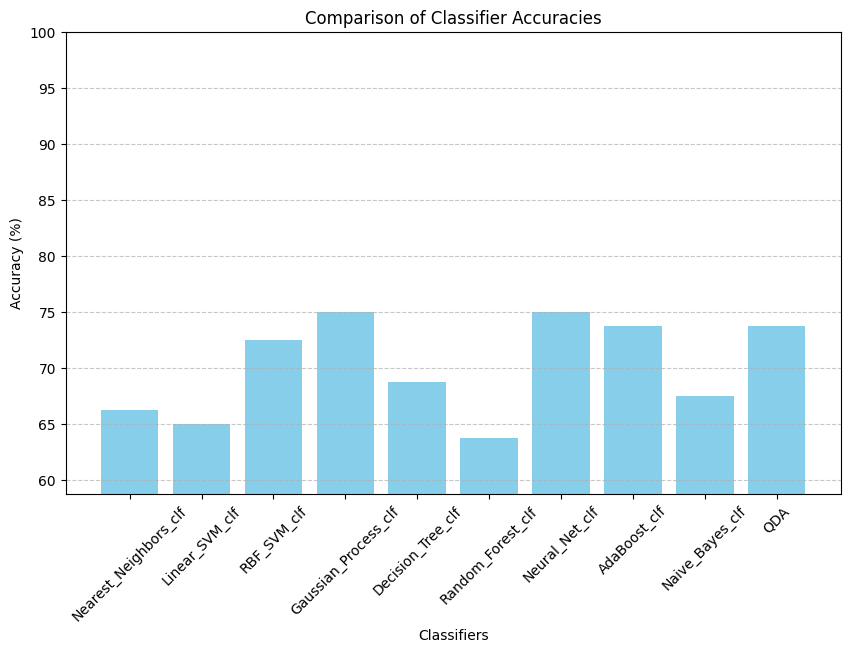

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(clf_names_list, accuracies, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Classifier Accuracies')
plt.ylim([min(accuracies) - 5, 100])  # Setting the y-axis limit for better visibility
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()